# Linear Regression Project

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Import Machine Learning Algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [4]:
#Import libraries for Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

In [5]:
#Now importing Data
data=pd.read_csv('https://raw.githubusercontent.com/araj2/customer-database/master/Ecommerce%20Customers.csv')
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

Avg. Session Length: Average session of in-store style advice sessions.

Time on App: Average time spent on App in minutes

Time on Website: Average time spent on Website in minutes

Length of Membership: How many years the customer has been a member.

Read in the Ecommerce Customers csv file as a DataFrame called customers.

In [6]:
data.shape

(500, 8)

In [7]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [9]:
#now we have visualize the data and the relationship
y=data['Yearly Amount Spent']
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

In [11]:
x=data[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
x

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


<Figure size 1440x1080 with 0 Axes>

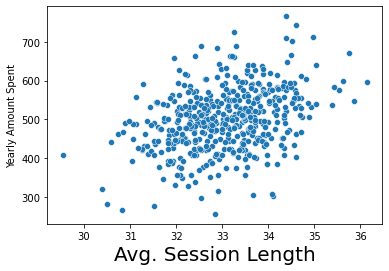

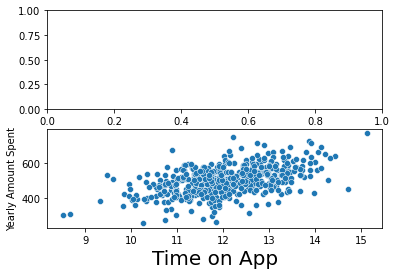

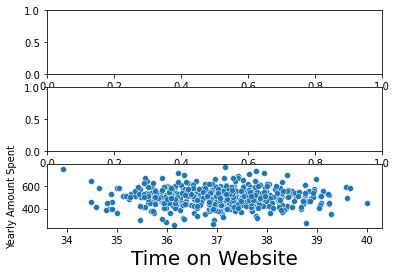

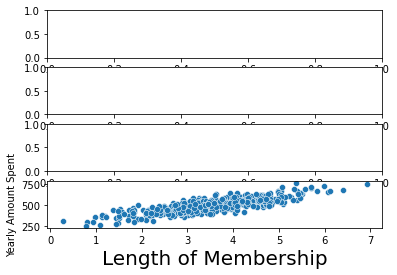

In [15]:
plt.figure(figsize=(20,15),facecolor='r')
plotnumber=1
for column in x :
    if plotnumber<=8:
        
            ax=plt.subplots(plotnumber)
            sns.scatterplot(x[column],y)
            plt.xlabel(column,fontsize=(20))
            plt.ylabel('Yearly Amount Spent')
    plotnumber +=1
plt.show()   

In [ ]:
#Its mean there is good relationship between app.but not with websites okay lets prove that

#Convert in Scaler

In [16]:
scaler=StandardScaler()

In [19]:
x_scaler=scaler.fit_transform(x)

In [20]:
x_scaler

array([[ 1.45635117,  0.60728003,  2.49358859,  0.55010651],
       [-1.13650215, -0.94946372,  0.20655573, -0.87092735],
       [-0.05272322, -0.72713923,  0.04968115,  0.5720669 ],
       ...,
       [-0.40987204, -0.55685385,  1.26018697,  1.42726105],
       [ 0.27159708,  0.34124841, -0.21829075, -1.19904197],
       [ 0.66842216,  0.36882066, -1.27732288, -0.79967926]])

In [ ]:
#Lets Do train Test

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.3,random_state=101)

In [ ]:
#check

In [22]:
data.tail()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642


In [23]:
regression=LinearRegression()

In [24]:
regression.fit(x_train,y_train)

LinearRegression()

In [25]:
regression.predict(scaler.transform([[33.715981,12.418808,35.771016,2.735160]]))

array([481.72355076])

In [ ]:
#Now lets check how good is our model.

In [26]:
regression.score(x_train,y_train)

0.9817562058732432

In [27]:
regression.score(x_test,y_test)

0.9890046246741234

In [28]:
pred=regression.predict(x_test)

<AxesSubplot:xlabel='Yearly Amount Spent'>

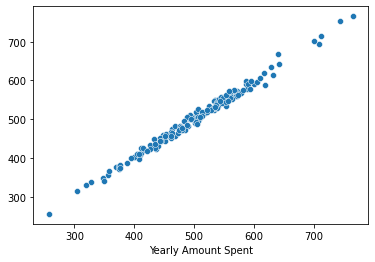

In [29]:
sns.scatterplot(y_test,pred)

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [31]:
mean_absolute_error(y_test,pred)

7.228148653430832

In [32]:
mean_squared_error(y_test,pred)

79.81305165097453

In [33]:
np.sqrt(mean_squared_error(y_test,pred))

8.933815066978639

In [ ]:
#Plot a Grampg of Residuals

<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

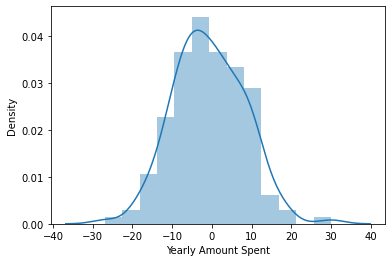

In [34]:
sns.distplot((y_test-pred))

Conclusion We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important. Let's see if we can interpret the coefficients at all to get an idea.

In [35]:
print(regression.coef_)

[25.76252659 38.32855202  0.19220992 61.17355707]


In [36]:
pd.DataFrame(regression.coef_,x.columns,columns=['Coefficient'])

,Coefficient
Avg. Session Length,25.762527
Time on App,38.328552
Time on Website,0.192210
Length of Membership,61.173557


How can you interpret these coefficients?

The greater the value the more related it is to the target, in this case yearly amount spent

Do you think the company should focus more on their mobile app or on their website?

The company should focus on the mobile app

Great Job! Congrats on your contract work! The company loved the insights! Let's move on.